<a href="https://colab.research.google.com/github/anilaksu/Natural-Language-Processing-Codes/blob/main/Udemy_NLP_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing with Pyhton Udemy Training**


Anil Aksu

Personal e-mail: aaa293@cornell.edu


## Notebook Organization:
- **Python Text Basics**
- **Natural Language Processing Basics**
- **Part of Speech Tagging and Named Entity Recognition**
- **Text Classification**
- **Semantics and Sentiment Analysis**
- **Topic Modeling**
- **Deep Learning for NLP**



# 1 Pyhton Text Basics


1.   Working with PDFS
2.   Regular Expressions



In [20]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/NLP


In [1]:
person = "Jose"
print("My name is {}".format(person)) # Old version

My name is Jose


In [2]:
print(f"My name is {person}")         # New version

My name is Jose


In [3]:
d = {'a':123, 'b':456}                # Sample dictionary
print(f"My number is {d['a']}")       # Output an element from dictionary

My number is 123


In [4]:
mylist = [0, 1, 2]
print(f"My number is {mylist[0]}")       # Output an element from list

My number is 0


In [12]:
library = [('Author', 'Topic', 'Pages'), ('Twain', 'Rafting', 601), ('Feynman', 'Physics', 95), ('Hamilton', 'Mythology', 144)]
library

for author, topic, pages in library:
  print(f"{author:{10}} {topic:{30}} {pages:{10}}")

print("\n")

for author, topic, pages in library:
  print(f"{author:{10}} {topic:{30}} {pages:>{10}}")

print("\n")

for author, topic, pages in library:
  print(f"{author:{10}} {topic:{30}} {pages:.>{10}}")

Author     Topic                          Pages     
Twain      Rafting                               601
Feynman    Physics                                95
Hamilton   Mythology                             144


Author     Topic                               Pages
Twain      Rafting                               601
Feynman    Physics                                95
Hamilton   Mythology                             144


Author     Topic                          .....Pages
Twain      Rafting                        .......601
Feynman    Physics                        ........95
Hamilton   Mythology                      .......144


In [14]:
from datetime import datetime
today = datetime(year = 2019, month = 2, day = 28)
print(f"{today}")
print(f"{today: %B %d, %Y}")

2019-02-28 00:00:00
 February 28, 2019


In [18]:
%%writefile test.txt
Hello, this is a quick test.
This is the second line of the file.

Overwriting test.txt


In [20]:
myfile = open('test.txt')
myfile.read()

'Hello, this is a quick test.\nThis is the second line of the file.\n'

In [21]:
myfile.seek(0) # Here we reset the cursor in the file
myfile.read()

'Hello, this is a quick test.\nThis is the second line of the file.\n'

In [23]:
myfile.seek(0) # Here we reset the cursor in the file
content = myfile.read()
print(content)

Hello, this is a quick test.
This is the second line of the file.



In [25]:
myfile.close() # Close it so that you can edit the file externally

In [26]:
myfile = open('test.txt')
myfile.readlines() # It reads line by line

['Hello, this is a quick test.\n', 'This is the second line of the file.\n']

In [28]:
myfile.seek(0) # Here we reset the cursor in the file
mylines = myfile.readlines() # It reads line by line

In [30]:
for line in mylines:
  print(line.split()[0])

Hello,
This


In [31]:
myfile = open('test.txt', 'w+') # It allows us to read and write the file

In [33]:
myfile.write('MY BRAND NEW TEXT')

17

In [34]:
myfile.seek(0)
myfile.read()

'MY BRAND NEW TEXT'

In [35]:
myfile.close()

In [36]:
## Appending an existing file
myfile = open('test.txt', 'a+')

In [37]:
myfile.write('MY FIRST LINE IN A+ OPENING')

27

In [39]:
myfile.close()

In [40]:
newfile = open('test.txt')
newfile.read()

'MY BRAND NEW TEXTMY FIRST LINE IN A+ OPENING'

In [44]:
newfile.close()

In [45]:
myfile = open('test.txt', mode = 'a+')
myfile.write('\nThis is an added line, because I used a+ mode')

46

In [46]:
myfile.seek(0)
myfile.read()

'MY BRAND NEW TEXTMY FIRST LINE IN A+ OPENINGThis is an added line, because I used a+ mode\nThis is an added line, because I used a+ mode'

In [50]:
with open('test.txt', 'r') as mynewfile: # Context Manager to read files automatically closes the file
  myvariable = mynewfile.readlines()

In [49]:
myvariable

['MY BRAND NEW TEXTMY FIRST LINE IN A+ OPENINGThis is an added line, because I used a+ mode\n',
 'This is an added line, because I used a+ mode']

## 1.1 Working with PDFs

In [3]:
!pip3 install PyPDF2 --upgrade --no-cache-dir
import PyPDF2
myfile = open('PDFs/US_Declaration.pdf', mode = 'rb')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00


FileNotFoundError: ignored

In [60]:
pdf_reader = PyPDF2.PdfReader(myfile) # Here we create a pdf reader
len(pdf_reader.pages)

5

In [65]:
page_one = pdf_reader.pages[0]
mytext = page_one.extract_text()
print(page_one.extract_text())
myfile.close()

Declaration of Independence
IN CONGRESS, July 4, 1776.  
The unanimous Declaration of the thirteen united States of America,  
When in the Course of human events, it becomes necessary for one people to dissolve thepolitical bands which have connected them with another, and to assume among the powers of theearth, the separate and equal station to which the Laws of Nature and of Nature's God entitlethem, a decent respect to the opinions of mankind requires that they should declare the causeswhich impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed bytheir Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit
of Happiness.— That to secure these rights, Governments are instituted among Men, derivingtheir just powers from the consent of the governed,—  That whenever any Form of Government
becomes destructive of these ends, it is the Right of the People to alter or to abolish it, 

In [70]:
f = open('PDFs/US_Declaration.pdf', mode = 'rb')
pdf_reader = PyPDF2.PdfReader(f)
first_page = pdf_reader.pages[0]
pdf_writer = PyPDF2.PdfWriter() # Here we initiate Pdf writer
pdf_writer.add_page(first_page)

{'/Type': '/Page',
 '/Contents': {},
 '/MediaBox': [0, 0, 612, 792],
 '/Resources': {'/Font': {'/F9': {'/Type': '/Font',
    '/Subtype': '/Type1',
    '/Name': '/F9',
    '/Encoding': '/WinAnsiEncoding',
    '/FirstChar': 31,
    '/LastChar': 255,
    '/Widths': [778,
     250,
     333,
     555,
     500,
     500,
     1000,
     833,
     278,
     333,
     333,
     500,
     570,
     250,
     333,
     250,
     278,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     500,
     333,
     333,
     570,
     570,
     570,
     500,
     930,
     722,
     667,
     722,
     722,
     667,
     611,
     778,
     778,
     389,
     500,
     778,
     667,
     944,
     722,
     778,
     611,
     778,
     722,
     556,
     667,
     722,
     722,
     1000,
     722,
     722,
     667,
     333,
     278,
     333,
     581,
     500,
     333,
     500,
     556,
     444,
     556,
     444,
     333,
     500,
     556,

In [80]:
pdf_output = open('MY_BRAND_NEW.pdf', mode = 'wb') # Write binary command

In [81]:
pdf_writer.write(pdf_output)

(False, <_io.BufferedWriter name='MY_BRAND_NEW.pdf'>)

In [82]:
pdf_output.close()
f.close()

In [85]:
brand_new = open('MY_BRAND_NEW.pdf', 'rb')

pdf_reader = PyPDF2.PdfReader(brand_new)
len(pdf_reader.pages)

1

In [92]:
f = open('PDFs/US_Declaration.pdf', mode = 'rb')
pdf_text = [0]
pdf_reader = PyPDF2.PdfReader(f)

for p in range(len(pdf_reader.pages)):

  page = pdf_reader.pages[p]

  pdf_text.append(page.extract_text())

f.close()

In [93]:
pdf_text

[0,
 "Declaration of Independence\nIN CONGRESS, July 4, 1776.  \nThe unanimous Declaration of the thirteen united States of America,  \nWhen in the Course of human events, it becomes necessary for one people to dissolve thepolitical bands which have connected them with another, and to assume among the powers of theearth, the separate and equal station to which the Laws of Nature and of Nature's God entitlethem, a decent respect to the opinions of mankind requires that they should declare the causeswhich impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed bytheir Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit\nof Happiness.— \x14That to secure these rights, Governments are instituted among Men, derivingtheir just powers from the consent of the governed,—  \x14That whenever any Form of Government\nbecomes destructive of these ends, it is the Right of the People to alter o

In [95]:
for page in pdf_text:
  print(page)
  print('\n')
  print('\n')
  print('\n')
  print('\n')

0








Declaration of Independence
IN CONGRESS, July 4, 1776.  
The unanimous Declaration of the thirteen united States of America,  
When in the Course of human events, it becomes necessary for one people to dissolve thepolitical bands which have connected them with another, and to assume among the powers of theearth, the separate and equal station to which the Laws of Nature and of Nature's God entitlethem, a decent respect to the opinions of mankind requires that they should declare the causeswhich impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed bytheir Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit
of Happiness.— That to secure these rights, Governments are instituted among Men, derivingtheir just powers from the consent of the governed,—  That whenever any Form of Government
becomes destructive of these ends, it is the Right of the People to alter or to ab

## 1.2 Regular Expressions


*   The key thing to keep in mind is that every character type has a corresponding pattern code
*   For example, digits have the placeholder pattern code of \d
*   The use of backslash allows python to understand that it is a special code and not the letter "d"
*   Regular expressions allow for pattern searrching in a text document
  *  For example, **r'\d{3}-\d{3}-\d{4}** refers to **3 digits dash another 3 digits dash another 4 digits**.  

In [96]:
text = "the phone number of the agetn is 408-555-1234. Call soon!"

In [97]:
"408-555-1234" in text

True

In [4]:
import re # Regular expression library
pattern = "phone"
my_match = re.search(pattern, text)
my_match.span()

(7, 12)

In [100]:
my_match.start()
my_match.end()

9

In [102]:
# To find all matches we use re.findall()
text = "my phone is a new phone"
re.findall("phone",text)

['phone', 'phone']

In [103]:
for match in re.finditer("phone", text):
  print(match.span())

(3, 8)
(18, 23)


**Identifiers for Characters in Patterns**

Characters such as a digit or a single string have different codes that represent them. You can use these to build up a pattern string. Notice how these make heavy use of the backwards slash \ . Because of this when defining a pattern string for regular expression we use the format:

    r'mypattern'
    
placing the r in front of the string allows python to understand that the \ in the pattern string are not meant to be escape slashes.

Below you can find a table of all the possible identifiers:

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

In [1]:
## Here we search for generalized patterns
text = "My telephone number is 777-555-1234"
pattern = r'\d\d\d-\d\d\d-\d\d\d\d'          # Pattern we are looking for

In [108]:
phone_number = re.search(pattern, text)
phone_number.span()

(23, 35)

In [109]:
phone_number.group()

'777-555-1234'

Notice the repetition of \d. That is a bit of an annoyance, especially if we are looking for very long strings of numbers. Let's explore the possible quantifiers.

**Quantifiers**

Now that we know the special character designations, we can use them along with quantifiers to define how many we expect.

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

In [111]:
pattern = r'\d{3}-\d{3}-\d{4}'
my_match = re.search(pattern,text)
my_match.group()

'777-555-1234'

In [7]:
## Grabbing separate expression groups
pattern = r'(\d{3})-(\d{3})-(\d{4})'
my_match = re.search(pattern,text)
my_match.group(1)  # This allows to access them individually

'1234'

In [8]:
re.search(r"man|woman", "This woman was here")

<re.Match object; span=(5, 10), match='woman'>

In [9]:
re.findall(r".at", "the cat in the hat sat") # Turns one letter before at

['cat', 'hat', 'sat']

In [10]:
re.findall(r"\d$", "This ends with a number 2")

['2']

In [11]:
phrase = "there are 3 numbers 34 inside 5 this sentence"
re.findall(r"[^\d]", phrase)

['t',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 's',
 ' ',
 ' ',
 'i',
 'n',
 's',
 'i',
 'd',
 'e',
 ' ',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e']

In [12]:
re.findall(r"[^\d]+", phrase)

['there are ', ' numbers ', ' inside ', ' this sentence']

In [14]:
# Here we remove punctuation from a sentece
test_phrase = "This is a string! but it has punctuation. How to remove it?"
re.findall(r"[^!.? ]+", test_phrase)

['This',
 'is',
 'a',
 'string',
 'but',
 'it',
 'has',
 'punctuation',
 'How',
 'to',
 'remove',
 'it']

In [15]:
my_list = re.findall(r"[^!.? ]+", test_phrase)
my_list

['This',
 'is',
 'a',
 'string',
 'but',
 'it',
 'has',
 'punctuation',
 'How',
 'to',
 'remove',
 'it']

In [17]:
' '.join(my_list)

'This is a string but it has punctuation How to remove it'

In [18]:
text = "Only find the hypen-words. Were are the long-ish dash words?"
re.findall(r'[\w]+-[\w]+',text)

['hypen-words', 'long-ish']

## Python Text Basics Exercises

f-Strings
1. Print an f-string that displays `NLP stands for Natural Language Processing` using the variables provided.

In [19]:
## Python Text Basics
abbr = 'NLP'
full_text = 'Natural Language Processing'

# Enter your code here:
print(f"{abbr} stands for {full_text}")         # New version

NLP stands for Natural Language Processing


**Files**
2. Create a file in the current working directory called `contacts.txt` by running the cell below:



In [49]:
%%writefile contacts.txt
First_Name Last_Name, Title, Extension, Email

Overwriting contacts.txt


3. Open the file and use .read() to save the contents of the file to a string called `fields`.  Make sure the file is closed at the end.

In [50]:
# Write your code here:
myfile = open('contacts.txt')
fields = myfile.read()
myfile.close() # Close it so that you can edit the file externally

# Run fields to see the contents of contacts.txt:
fields

'First_Name Last_Name, Title, Extension, Email\n'

Working with PDF Files
4. Use PyPDF2 to open the file `Business_Proposal.pdf`. Extract the text of page 2.

In [51]:
# Perform import
!pip3 install PyPDF2 --upgrade --no-cache-dir
import PyPDF2;

# Open the file as a binary object
myfile = open('PDFs/Business_Proposal.pdf', mode = 'rb')

# Use PyPDF2 to read the text of the file
pdf_reader = PyPDF2.PdfReader(myfile) # Here we create a pdf reader

# Get the text from page 2 (CHALLENGE: Do this in one step!)
page_two = pdf_reader.pages[1]
page_two_text = page_two.extract_text()


# Close the file
myfile.close()

# Print the contents of page_two_text
print(page_two_text)

AUTHORS:  
Amy Baker, Finance Chair, x345, abaker@ourcompany.com  
Chris Donaldson, Accounting Dir., x621, cdonaldson@ourcompany.com  
Erin Freeman, Sr. VP, x879, efreeman@ourcompany.com  


5. Open the file `contacts.txt` in append mode. Add the text of page 2 from above to `contacts.txt`.

CHALLENGE: See if you can remove the word "AUTHORS:"

In [52]:
myfile = open('contacts.txt', mode = 'a+')
myfile.write(page_two_text)

188

In [53]:
myfile.seek(0)
myfile.read()

'First_Name Last_Name, Title, Extension, Email\nAUTHORS:  \nAmy Baker, Finance Chair, x345, abaker@ourcompany.com  \nChris Donaldson, Accounting Dir., x621, cdonaldson@ourcompany.com  \nErin Freeman, Sr. VP, x879, efreeman@ourcompany.com  '

In [55]:
# Simple Solution
with open('contacts.txt', 'a+') as f:
  f.write(page_two_text[8:])
  f.seek(0)
  print(f.read())

First_Name Last_Name, Title, Extension, Email
AUTHORS:  
Amy Baker, Finance Chair, x345, abaker@ourcompany.com  
Chris Donaldson, Accounting Dir., x621, cdonaldson@ourcompany.com  
Erin Freeman, Sr. VP, x879, efreeman@ourcompany.com  AUTHORS:  
Amy Baker, Finance Chair, x345, abaker@ourcompany.com  
Chris Donaldson, Accounting Dir., x621, cdonaldson@ourcompany.com  
Erin Freeman, Sr. VP, x879, efreeman@ourcompany.com    
Amy Baker, Finance Chair, x345, abaker@ourcompany.com  
Chris Donaldson, Accounting Dir., x621, cdonaldson@ourcompany.com  
Erin Freeman, Sr. VP, x879, efreeman@ourcompany.com  


Regular Expressions
6. Using the `page_two_text` variable created above, extract any email addresses that were contained in the file `Business_Proposal.pdf`.

In [56]:
import re

# Enter your regex pattern here. This may take several tries!
pattern = r'[\w]+@[\w]+'

re.findall(pattern, page_two_text)

['abaker@ourcompany', 'cdonaldson@ourcompany', 'efreeman@ourcompany']

#2 Natural Language Processing Basics

**What is Natural Language Processing?**

An area of computer science and artificial intelligence concerned with the interactions between computers and human languages, in particular how to program computers to process and analyze large amounts of natural language data.

1.   Setup Spacy and Language Library
2.   Understand Basic NLP topics:
  *   Tokenization
  *   Stemming
  *   Lemmatization
  *   Stop words
3. Spacy for Vocabulary Matching





## 2.1 Spacy Basics
**What is Spacy?**
*   Open Source Natural Language Processing Library
*   Designed to effectively handle NLP tasks with the most efficient implementation of common algorithms

**What is NLTK?**
*   NLTK - Natural Language Toolkit is a very popular open source.
*   Initially released in 2001, it is much older than Spacy
*   It also provides many functionalities, but includes less efficient implementations

The **nlp()** function from Spacy automatically takes raw text and performs a series of operations to tag, parse, and describe the text data.

**Dependencies**

We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [57]:
!pip3 install spacy --upgrade --no-cache-dir
import spacy

In [59]:
nlp = spacy.load('en_core_web_sm') # Here we import English NLP language

In [60]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

In [64]:
for token in doc:
  print(token.text, token.pos, token.pos_,  token.dep_) # pos recognizes Adjective, Number, Pronoun

Tesla 96 PROPN nsubj
is 87 AUX aux
looking 100 VERB ROOT
at 85 ADP prep
buying 100 VERB pcomp
U.S. 96 PROPN compound
startup 92 NOUN dobj
for 85 ADP prep
$ 99 SYM quantmod
6 93 NUM compound
million 93 NUM pobj


In [65]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7cff1c6f7fa0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7cff1c6f7040>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7cff1c524eb0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7cff1c9b4740>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7cff1c35d740>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7cff1c525070>)]

In [66]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [67]:
# Tokenization
doc2 = nlp(u"Tesla isn't looking into startups anymore")

In [68]:
for token in doc2:
  print(token.text, token.pos, token.pos_,  token.dep_) # pos (Part of Speech Tagging) recognizes Adjective, Number, Pronoun

Tesla 96 PROPN nsubj
is 87 AUX aux
n't 94 PART neg
looking 100 VERB ROOT
into 85 ADP prep
startups 92 NOUN pobj
anymore 86 ADV advmod


In [70]:
doc2[0].pos_

'PROPN'

In [71]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [72]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [73]:
type(life_quote) # Spacy recognizes span, separate from entire doc3

spacy.tokens.span.Span

In [74]:
doc4 = nlp(u"This is the first sentence. This is another sentence.")

for sentence in doc4.sents: # Spacy automatically understands dot and space means the end of the sentence
  print(sentence)

This is the first sentence.
This is another sentence.


## 2.2 Tokenization

*  Notice that tokens are pieces of the original text
*  Tokens are the basic building blocks of a `Doc`object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another

**Types of tokens:**

*   Prefix: Characters at the beginning: **$("?**
*   Suffix: Characters at the end:       **km),.!"**
*   Infix: Characters in between:        **- --/... **
*   Exception: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied: **let's U.S.**



|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

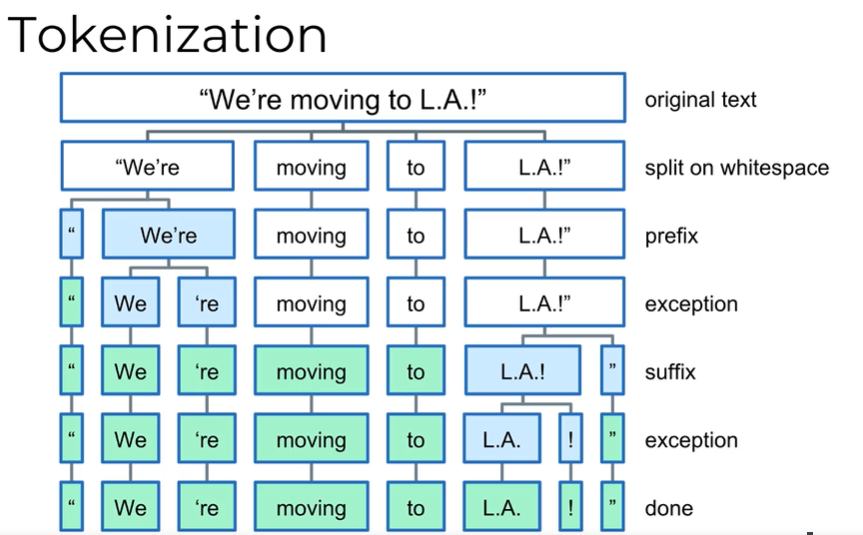

In [1]:
import spacy
nlp =spacy.load('en_core_web_sm')

In [3]:
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [4]:
doc = nlp(mystring)

In [5]:
for token in doc:
  print(token.text)

"
We
're
moving
to
L.A.
!
"


In [6]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com")

In [7]:
for t in doc2:
  print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com


In [8]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [9]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [10]:
len(doc4) # Tells the number of tokes

11

In [12]:
len(doc4.vocab) # Tells the number of vocabulary in 'en_core_web_sm'

794

In [13]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents: # Spacy also derive entities automatically
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


**Noun Chunks**

Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [14]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


**Built-in Visualizers**

spaCy includes a built-in visualization tool called **displaCy**. displaCy is able to detect whether you're working in a Jupyter notebook, and will return markup that can be rendered in a cell right away. When you export your notebook, the visualizations will be included as HTML.

For more info visit https://spacy.io/usage/visualizers

In [17]:
from spacy import displacy # You can both run inside and outside of the notebook
doc = nlp(u"Apple is going to build a U.K. factory for $6 million.")
displacy.render(doc, style = 'dep', jupyter=True, options = {'distance':110})

In [18]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit")
displacy.render(doc, style = 'ent', jupyter=True, options = {'distance':110})

## 2.3 Stemming

Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()       # Porter Stemmer

In [20]:
words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly']

for word in words:
  print(word + '---->' + p_stemmer.stem(word))

run---->run
runner---->runner
ran---->ran
runs---->run
easily---->easili
fairly---->fairli


In [22]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language = 'english') # Snowball Stemmer

for word in words:
  print(word + '---->' + s_stemmer.stem(word))

run---->run
runner---->runner
ran---->ran
runs---->run
easily---->easili
fairly---->fair


In [23]:
words = ['generous', 'generation', 'generously', 'generate']

for word in words:
  print(word + '---->' + s_stemmer.stem(word))

generous---->generous
generation---->generat
generously---->generous
generate---->generat


## 2.4 Lematization

In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [24]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [25]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [26]:
### Function to display lemmas
# Since the display above is staggared and hard to read, let's write a function that displays the information we want more neatly.

def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [27]:
doc2 = nlp(u"I saw ten mice today!")
show_lemmas(doc2)

I            PRON   4690420944186131903    I
saw          VERB   11925638236994514241   see
ten          NUM    7970704286052693043    ten
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


## 2.5 Stop Words

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [29]:
print(nlp.Defaults.stop_words)

{'he', 'together', 'could', 'put', 'down', 'next', 'nor', 'are', 'neither', 'whole', 'indeed', 'nowhere', 'was', 'ca', 'across', 'sixty', 'because', 'too', 'still', 'along', 'anyhow', '‘d', 'for', 'amongst', 'without', 'which', 'whoever', 'beforehand', 'us', 'will', 'such', 'take', 'hereby', 'although', 'must', 'show', 'sometime', 'below', 'go', 'everyone', 'hers', 'back', 'into', 'regarding', 'becoming', 'do', 'really', "'re", 'these', 'whereby', 'otherwise', 'when', 'anything', 'ever', 'most', 're', 'others', '’s', 'get', 'cannot', 'is', 'name', '’re', 'where', 'again', 'noone', 'itself', 'through', 'make', 'though', 'per', "'m", 'however', 'yours', 'while', 'more', 'bottom', 'on', 'nothing', 'except', 'thereby', 'between', 'does', 'behind', 'hereupon', 'up', 'seeming', 'whether', 'among', 'even', 'those', 'him', 'hence', '’m', 'nine', '‘re', 'onto', 'few', 'whereupon', 'keep', 'side', 'would', 'herself', '’ve', 'n‘t', 'well', 'our', 'has', 'its', 'besides', 'forty', 'then', 'full', 

In [31]:
# You can check if the word is a stop word
nlp.vocab['is'].is_stop

True

In [36]:
# Adding a stop word manually
nlp.Defaults.stop_words.add('btw')
# Alternatively
nlp.vocab['btw'].is_stop = True
nlp.vocab['btw'].is_stop

True

In [35]:
# Remove a stop word
nlp.Defaults.stop_words.remove('beyond')
nlp.vocab['beyond'].is_stop = False
nlp.vocab['beyond'].is_stop

False

## 2.6 Phrase Matching and Vocabulary

**Rule-based Matching**

spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [37]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [38]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [41]:
pattern1 = [{'LOWER': 'solarpower'}] #SolarPower
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT':True},{'LOWER': 'power'}] #Solar-power
pattern3 = [{'LOWER': 'solar'}, {'LOWER': 'power'}] # Solar power

This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


In [45]:
matcher.add('SolarPower',  [pattern1, pattern2, pattern3])

In [46]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [47]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [48]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


In [51]:
# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Redefine the patterns:
pattern1 = [{'LOWER': 'solarpower'}] # solarpower
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}] # solar + OP + power

matcher.add('SolarPower', [pattern1, pattern2])

In [50]:
doc2 = nlp(u"Solar--Power is solarpower yay!")

In [53]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 4, 5)]


**Other token attributes**

Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

In [56]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/NLP


In [58]:
# Match on terminology list
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
nlp = spacy.load('en_core_web_sm')

In [82]:
with open('TEXTs/reaganomics.txt', encoding="utf8", errors='ignore') as f:
  doc3 = nlp(f.read())

In [63]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

# Next, convert each phrase to a Doc object:
phrase_patterns = [nlp(text) for text in phrase_list]

In [76]:
# Pass each Doc object into matcher (note the use of the asterisk!):
matcher.add('EconMatcher', phrase_patterns)

# Build a list of matches:
matches = matcher(doc3)

In [72]:
matches

[(3680293220734633682, 41, 45),
 (3473369816841043438, 41, 45),
 (3680293220734633682, 49, 53),
 (3473369816841043438, 49, 53),
 (3680293220734633682, 54, 56),
 (3473369816841043438, 54, 56),
 (3680293220734633682, 61, 65),
 (3473369816841043438, 61, 65),
 (3680293220734633682, 673, 677),
 (3473369816841043438, 673, 677),
 (3680293220734633682, 2986, 2990),
 (3473369816841043438, 2986, 2990)]

In [79]:
for match_id, start, end in matches:
  try:
    #string_id = nlp.vocab.strings[match_id] # get string represenation
    span = doc3[start-5:end+5]                  # get the matched span
    print(match_id,  start, end, span.text)
  except:
    pass

3680293220734633682 41 45 policies are commonly associated with supply-side economics, referred to as trickle
3473369816841043438 41 45 policies are commonly associated with supply-side economics, referred to as trickle
3680293220734633682 49 53 economics, referred to as trickle-down economics or voodoo economics by political
3473369816841043438 49 53 economics, referred to as trickle-down economics or voodoo economics by political
3680293220734633682 54 56 trickle-down economics or voodoo economics by political opponents, and
3473369816841043438 54 56 trickle-down economics or voodoo economics by political opponents, and
3680293220734633682 61 65 by political opponents, and free-market economics by political advocates.


3473369816841043438 61 65 by political opponents, and free-market economics by political advocates.


3680293220734633682 673 677 attracted a following from the supply-side economics movement, which formed in
3473369816841043438 673 677 attracted a following from the 

**Viewing Matches**

There are a few ways to fetch the text surrounding a match. The simplest is to grab a slice of tokens from the doc that is wider than the match:

In [67]:
doc3[41:45]  # Note that the fifth match starts at doc3[673]

supply-side economics

## Natural Language Processing Basics Exercises

For this assessment we'll be using the short story [_An Occurrence at Owl Creek Bridge_](https://en.wikipedia.org/wiki/An_Occurrence_at_Owl_Creek_Bridge) by Ambrose Bierce (1890). <br>The story is in the public domain; the text file was obtained from [Project Gutenberg](https://www.gutenberg.org/ebooks/375.txt.utf-8).

In [ ]:
# RUN THIS CELL to perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [84]:
with open('TEXTs/owlcreek.txt', encoding="utf8", errors='ignore') as f:
  doc = nlp(f.read())

In [85]:
doc

AN OCCURRENCE AT OWL CREEK BRIDGE

by Ambrose Bierce

I

A man stood upon a railroad bridge in northern Alabama, looking down
into the swift water twenty feet below.  The man's hands were behind
his back, the wrists bound with a cord.  A rope closely encircled his
neck.  It was attached to a stout cross-timber above his head and the
slack fell to the level of his knees.  Some loose boards laid upon the
ties supporting the rails of the railway supplied a footing for him
and his executioners--two private soldiers of the Federal army,
directed by a sergeant who in civil life may have been a deputy
sheriff.  At a short remove upon the same temporary platform was an
officer in the uniform of his rank, armed.  He was a captain.  A
sentinel at each end of the bridge stood with his rifle in the
position known as "support," that is to say, vertical in front of the
left shoulder, the hammer resting on the forearm thrown straight
across the chest--a formal and unnatural position, enforcing an ere

In [86]:
len(doc) # Tells the number of tokens

4835

In [93]:
# Tells the number of sentences
print(f"Actual number of sentences: {len(list(doc.sents))}")

Actual number of sentences: 204


In [96]:
# Second Sentence
list(doc.sents)[1]

The man's hands were behind
his back, the wrists bound with a cord.  

In [99]:
## 5. For each token in the sentence above, print its `text`, `POS` tag, `dep` tag and `lemma`<br>
for token in list(doc.sents)[1]:
  print(f'{token.text:{12}} {token.pos_:{6}} {token.dep_:{6}} {token.lemma_:{6}}')

The          DET    det    the   
man          NOUN   poss   man   
's           PART   case   's    
hands        NOUN   nsubj  hand  
were         AUX    ROOT   be    
behind       ADP    prep   behind

            SPACE  dep    
     
his          PRON   poss   his   
back         NOUN   pobj   back  
,            PUNCT  punct  ,     
the          DET    det    the   
wrists       NOUN   appos  wrist 
bound        VERB   acl    bind  
with         ADP    prep   with  
a            DET    det    a     
cord         NOUN   pobj   cord  
.            PUNCT  punct  .     
             SPACE  dep          


 **Write a matcher called 'Swimming' that finds both occurrences of the phrase "swimming vigorously" in the text**

HINT: You should include an `'IS_SPACE': True` pattern between the two words!

In [107]:
# Import the Matcher library:

from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [122]:
# Create a pattern and add it to matcher:
pattern = [{'LOWER': 'swimming'}, {'IS_SPACE': True, 'OP':'*'}, {'LOWER': 'vigorously'}] # swimming +space + vigorously

matcher.add('swimmingvigorously', [pattern])

In [123]:
# Create a list of matches called "found_matches" and print the list:
found_matches = matcher(doc)
print(found_matches)

[(267723323558233093, 1274, 1277), (267723323558233093, 3609, 3612)]


**Print the text surrounding each found match**

In [124]:
for match_id, start, end in found_matches:
    span = doc[start-5:end+5]                  # get the matched span
    print(span.text)

evade the bullets and, swimming
vigorously, reach the bank,
shoulder; he was now swimming
vigorously with the current.  


**Print sentence surrounding each found match**

In [125]:
for sentence in doc.sents:
    if found_matches[0][1] < sentence.end:
      print(sentence)
      break

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home.  


In [126]:
for sentence in doc.sents:
    if found_matches[1][1] < sentence.end:
      print(sentence)
      break

The hunted man saw all this over his shoulder; he was now swimming
vigorously with the current.  


#3 Part of Speech Tagging (POS) and Named Entity Recognition (NER)

## 3.1 Part of Speech Tagging

**Coarse-grained Part-of-speech Tags**

Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

___
**Fine-grained Part-of-speech Tags**

Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back")
print(doc.text)

The quick brown fox jumped over the lazy dog's back


In [5]:
print(doc[4].pos_) # Coarse Grained Tag

VERB


In [6]:
print(doc[4].tag_) # Fine Grained Tag

VBD


In [8]:
for token in doc:
  print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

The        DET        DT         determiner
quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox        NOUN       NN         noun, singular or mass
jumped     VERB       VBD        verb, past tense
over       ADP        IN         conjunction, subordinating or preposition
the        DET        DT         determiner
lazy       ADJ        JJ         adjective (English), other noun-modifier (Chinese)
dog        NOUN       NN         noun, singular or mass
's         PART       POS        possessive ending
back       NOUN       NN         noun, singular or mass


In [13]:
doc = nlp(u"I read books on NLP")
token = doc[1]
token.text

'read'

In [14]:
print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

read       VERB       VBP        verb, non-3rd person singular present


In [15]:
doc = nlp(u"I read a book on NLP")

In [16]:
token = doc[1]
print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

read       VERB       VBD        verb, past tense


In [17]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back")

In [18]:
POS_counts = doc.count_by(spacy.attrs.POS) # It returns number of different Part of Speech i.e. Adjective, Noun, Adverb and their count
POS_counts

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1}

In [21]:
doc.vocab[84].text # Here we check what 84 represents

'ADJ'

In [20]:
doc[2].pos_       # Here we check it by corresponding token

'ADJ'

In [23]:
for k, v in sorted(POS_counts.items()):
  print(f"{k}.{doc.vocab[k].text:{5}} {v}")

84.ADJ   3
85.ADP   1
90.DET   2
92.NOUN  3
94.PART  1
100.VERB  1


In [24]:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k, v in sorted(TAG_counts.items()):
  print(f"{k}.{doc.vocab[k].text:{5}} {v}")

74.POS   1
1292078113972184607.IN    1
10554686591937588953.JJ    3
15267657372422890137.DT    2
15308085513773655218.NN    3
17109001835818727656.VBD   1


**Visualizing Part of Speech**

In [25]:
from spacy import displacy

doc = nlp(u"The quick brown fox jumped over the lazy dog")

displacy.render(doc, style = 'dep', jupyter = True)

In [26]:
# Options dictionary
options = {'distance':110, 'commpact':'True', 'color':'yellow', 'bg':'#09a3d5', 'font':'Times'}

In [27]:
displacy.render(doc, style = 'dep', jupyter = True, options = options)

In [29]:
doc2 = nlp(u"This is a sentence. This is another sentence, possible longer than the other.")

In [31]:
spans = list(doc2.sents) # Grabs sentences automatically
displacy.serve(spans, style = 'dep', options = {'distance':110})


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## 3.2 Named Entity Recognition

Named-entity recognition (NER) seeks to locate and classify named entity mentions in unstructured text into pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

**Entity annotations**

`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>


In [32]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + '-' +ent.label_ + '-' +str(spacy.explain(ent.label_)))
  else:
    print('No entities found')

In [34]:
doc = nlp(u"Hi how are you?")
show_ents(doc)

No entities found


In [36]:
doc = nlp(u"May I go to Washington, DC next May to see the Washington Monument?")
show_ents(doc)

Washington, DC-GPE-Countries, cities, states
next May-DATE-Absolute or relative dates or periods
the Washington Monument-ORG-Companies, agencies, institutions, etc.


In [37]:
doc = nlp(u"Can I please have 500 dollars of Microsoft stock?")
show_ents(doc)

500 dollars-MONEY-Monetary values, including unit
Microsoft-ORG-Companies, agencies, institutions, etc.


**NER Tags**

Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

In [42]:
doc = nlp(u"Tesla to build a U.K. factory for $6 million")
show_ents(doc)


U.K.-GPE-Countries, cities, states
$6 million-MONEY-Monetary values, including unit


tuple

In [43]:
from spacy.tokens import Span
ORG = doc.vocab.strings[u"ORG"]     # Here we add new entity
new_ent = Span(doc, 0, 1, label = ORG)
doc.ents = tuple(list(doc.ents) + [new_ent]) # Here we need to convert it to tuple to insert it to entities

show_ents(doc)

Tesla-ORG-Companies, agencies, institutions, etc.
U.K.-GPE-Countries, cities, states
$6 million-MONEY-Monetary values, including unit


In [55]:
# Here we add several Named Entities
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

doc = nlp(u"Our company created a brand new vacuum cleaner."
          u"This new vacuum-cleaner is the best in show.")
show_ents(doc)

No entities found


In [56]:
matcher = PhraseMatcher(nlp.vocab)
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]
matcher.add('newproduct', phrase_patterns)

In [50]:
found_matches = matcher(doc)
found_matches

[(2689272359382549672, 6, 8), (2689272359382549672, 11, 14)]

In [52]:
PROD = doc.vocab.strings[u"PRODUCT"]

In [57]:
new_ents = [Span(doc, match[1], match[2], label = PROD) for match in found_matches]

doc.ents = tuple(list(doc.ents) + new_ents)

show_ents(doc)

vacuum cleaner-PRODUCT-Objects, vehicles, foods, etc. (not services)
vacuum-cleaner-PRODUCT-Objects, vehicles, foods, etc. (not services)


In [59]:
doc = nlp(u"Originally I paid $29.95 for this car toy, but now it is marked down by $10.")

show_ents(doc)

[ent for ent in doc.ents if ent.label_ == "MONEY"]

29.95-MONEY-Monetary values, including unit
10-MONEY-Monetary values, including unit


[29.95, 10]

**Visualizing Named Entity Recognition**

In [61]:
# Here we visualize several Named Entities
import spacy
from spacy import displacy

doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million"
          u"By contrast, Sony only sold 8 thousand Walkman music players")

displacy.render(doc, style = 'ent', jupyter = True)

In [62]:
for sent in doc.sents:
  displacy.render(nlp(sent.text),style = 'ent', jupyter = True)

In [67]:
# Here we highlight product entities
#colors = {'ORG':'#aa9cfc'}
#colors = {'ORG':'radial-gradient(yellow, green)'}
colors = {'ORG':'linear-gradient(90deg, #aa9cfc, #fc9ce7)'}
options = {'ents':['PRODUCT', 'ORG'], 'colors' : colors}
displacy.render(doc, style = 'ent', jupyter = True, options = options)

In [69]:
displacy.serve(doc, style = 'ent',  options = options)


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## 3.3 Sentence Segmentation

In [87]:
import spacy
from spacy.language import Language

nlp = spacy.load('en_core_web_sm')
doc = nlp(u"This is a sentence. This is another sentence, possible longer than the other. This is the last sentence.")

In [73]:
for sent in doc.sents:
  print(sent)

This is a sentence.
This is another sentence, possible longer than the other.
This is the last sentence.


In [75]:
list(doc.sents)[0]

This is a sentence.

In [76]:
doc = nlp(u'"Management is doing the right things; leadership is doing the right things." - Peter Drucker')
doc.text

'"Management is doing the right things; leadership is doing the right things." - Peter Drucker'

In [77]:
for sent in doc.sents:
  print(sent)
  print('\n')

"Management is doing the right things; leadership is doing the right things."


- Peter Drucker




In [91]:
## Add a segmentation rule
@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
  for token in doc[:-1]:
    if token.text == ';':
      doc[token.i + 1].is_sent_start = True
  return doc

In [92]:
nlp.add_pipe("set_custom_boundaries", before = 'parser')
nlp.pipe_names

['tok2vec',
 'tagger',
 'component',
 'set_custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [93]:
doc4 = nlp(u'"Management is doing the right things; leadership is doing the right things." - Peter Drucker')

In [94]:
for sent in doc4.sents:
  print(sent)

"Management is doing the right things;
leadership is doing the right things."
- Peter Drucker


## Part of Speech Tagging Exercises

In [1]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/NLP


For this assessment we'll be using the short story [The Tale of Peter Rabbit](https://en.wikipedia.org/wiki/The_Tale_of_Peter_Rabbit) by Beatrix Potter (1902). <br>The story is in the public domain; the text file was obtained from [Project Gutenberg](https://www.gutenberg.org/ebooks/14838.txt.utf-8).

In [157]:
# RUN THIS CELL to perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy

In [158]:
with open('TEXTs/peterrabbit.txt', encoding="utf8", errors='ignore') as f:
  doc = nlp(f.read())

**For every token in the third sentence, print the token text, the POS tag, the fine-grained TAG tag, and the description of the fine-grained tag.**

In [159]:
for token in list(doc.sents)[2]:
  print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

They       PRON       PRP        pronoun, personal
lived      VERB       VBD        verb, past tense
with       ADP        IN         conjunction, subordinating or preposition
their      PRON       PRP$       pronoun, possessive
Mother     NOUN       NN         noun, singular or mass
in         ADP        IN         conjunction, subordinating or preposition
a          DET        DT         determiner
sand       NOUN       NN         noun, singular or mass
-          PUNCT      HYPH       punctuation mark, hyphen
bank       NOUN       NN         noun, singular or mass
,          PUNCT      ,          punctuation mark, comma
underneath ADP        IN         conjunction, subordinating or preposition
the        DET        DT         determiner
root       NOUN       NN         noun, singular or mass
of         ADP        IN         conjunction, subordinating or preposition
a          DET        DT         determiner

          SPACE      _SP        whitespace
very       ADV        RB       

**Provide a frequency list of POS tags from the entire document**

In [160]:
POS_counts = doc.count_by(spacy.attrs.POS) # It returns number of different Part of Speech i.e. Adjective, Noun, Adverb and their count
for k, v in sorted(POS_counts.items()):
  print(f"{k}.{doc.vocab[k].text:{5}} {v}")

84.ADJ   53
85.ADP   125
86.ADV   63
87.AUX   49
89.CCONJ 61
90.DET   90
92.NOUN  172
93.NUM   9
94.PART  28
95.PRON  110
96.PROPN 74
97.PUNCT 171
98.SCONJ 19
100.VERB  135
103.SPACE 99


**CHALLENGE: What percentage of tokens are nouns?**

In [174]:
print(f"Percentage of Nouns is {POS_counts[92]/len(doc)*100:.2f}%")

Percentage of Nouns is 13.67%


**Display the Dependency Parse for the third sentence**

In [187]:
from spacy import displacy

displacy.render(list(doc.sents)[2], style = 'dep', jupyter = True)

**Show the first two named entities from Beatrix Potter's The Tale of Peter Rabbit**

In [179]:
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents[0:2]:
      print(ent.text + '-' +ent.label_ + '-' +str(spacy.explain(ent.label_)))
  else:
    print('No entities found')

In [180]:
show_ents(doc)

The Tale of Peter Rabbit-WORK_OF_ART-Titles of books, songs, etc.
Beatrix Potter-PERSON-People, including fictional


**How many sentences are contained in *The Tale of Peter Rabbit*?**

In [181]:
# Tells the number of sentences
print(f"Actual number of sentences: {len(list(doc.sents))}")

Actual number of sentences: 55


**CHALLENGE: How many sentences contain named entities?**

In [182]:
def count_sentence_with_ents(doc):
  count = 0
  for sent in doc.sents:
    if sent.ents:
      count +=1
  return count

In [213]:
#list_of_sents = [nlp(sent.text) for sent in doc.sents]
#list_of_ners =  [doc for doc in list_of_sents if doc.ents]

print(f"number of sentences with named entites is {count_sentence_with_ents(doc)}")

36
number of sentences with named entites is 35


**CHALLENGE: Display the named entity visualization for `list_of_sents[0]` from the previous problem**

In [211]:
from spacy import displacy

displacy.render(nlp(list(doc.sents)[0].text), style = 'ent', jupyter = True)

#4 Text Classification

We need to perform a feature extraction from the raw text in order to pass numerical features to the machine learning algorithm.

*   **Term frequency tf(t,d)**: the raw count of a term in a document, the number of times in a document, the number of times that term t occurs in document d.
*   **Inverse Document Frequency**: the factor which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely. The logarithmically scaled inverse fraction of the documents that contain the word

\begin{equation}
\text{tfidf}(t,d,D) = \text{tf}(t,d) \times \text{idf}(t,D)
\end{equation}

\begin{equation}
\text{idf}(t,d,D) = \log \frac{N}{\left | \left \{ d \in D : t \in d \right \} \right |}
\end{equation}

##4.1 Text Feature Extraction

In [ ]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('TEXTs/smsspamcollection.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Here we create variables
X = df['message']
y = df['label']

# Here we split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

# Initiate the vectorizer
count_vect = CountVectorizer()

# Fit vectorizer to the data
#count_vect.fit(X_train)
#X_train_counts = count_vect.transform(X_train)
# Transform the original test message
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [ ]:
# Here we create TF-IDF model
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [14]:
# Also the vectorization and TF-IIDF model can be created at once
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [16]:
# Here we train classifier
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [19]:
# Here we create a pipeline object includes both vectorization and classifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [24]:
# Here we make predictions using our pipeline
predictions = text_clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[1586    7]
 [  12  234]]
0.989668297988037


In [26]:
text_clf.predict(["Congratulations! You've been selected as a winner. Text won to 4255 congratulations."])

array(['spam'], dtype=object)

##4.2 Text Classification Code

In [ ]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv('TEXTs/moviereviews.tsv', sep = '\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [29]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [37]:
df.dropna(inplace=True)
df.isnull().sum()

label     0
review    0
dtype: int64

In [38]:
# Here we check if the review is a white space
blanks = []

for i, lb, rv in df.itertuples():
  if rv.isspace():
    blanks.append(i)

df.drop(blanks, inplace = True)
len(df)

1938

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Here we create variables
X = df['review']
y = df['label']

# Here we split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)

# Here we create a pipeline object includes both vectorization and classifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
text_clf.fit(X_train,y_train)

# Here we make predictions using our pipeline
predictions = text_clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[224  42]
 [ 56 260]]
0.8316151202749141


In [48]:
text_clf.predict(["This movie is hilarious."])

array(['pos'], dtype=object)

## Text Classification Assessment

This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/NLP

**Perform imports and load the dataset into a pandas DataFrame**

In [50]:
import numpy as np
import pandas as pd

df = pd.read_csv('TEXTs/moviereviews2.tsv', sep = '\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


**Check for missing values:**

In [51]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [52]:
df.dropna(inplace=True)
df.isnull().sum()

label     0
review    0
dtype: int64

In [53]:
# Here we check if the review is a white space
blanks = []

for i, lb, rv in df.itertuples():
  if rv.isspace():
    blanks.append(i)

df.drop(blanks, inplace = True)
len(df)

5980

**Take a quick look at the label column:**

In [58]:
df['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

**Split the data into train & test sets:**

You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Here we create variables
X = df['review']
y = df['label']

# Here we split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

**Build a pipeline to vectorize the date, then train and fit a model**

You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [55]:
# Here we create a pipeline object includes both vectorization and classifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
text_clf.fit(X_train,y_train)

# Here we make predictions using our pipeline
predictions = text_clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[900  91]
 [ 63 920]]
0.9219858156028369


In [57]:
text_clf.predict(["This movie sucks."])

array(['neg'], dtype=object)